### Recuperação da Informação
#### Professor: Leandro Balby

#### Aluno: Lucas Barros Rocha - 115111579
 
## Laboratório 2 - Estátisticas da Coleção e Lei de Zipf

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

#### Dados: notícias retiradas por crawler+scraper de portais de notícas online.

In [2]:
df = pd.read_csv('./results.csv')

## Questão 1. Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção.

* Fazendo contagem das palavras

In [3]:
total_textos = df.text.count()

TAMANHO_MINIMO_PALAVRA = 3
todas_palavras = []
total_ocorrencia_palavras = 0

tknz = RegexpTokenizer(r'(\b[A-Za-z][a-z]{2,27}\b)')

for texto in df.text:
   palavras = [palavra for palavra in tknz.tokenize(texto.lower())
           if len(palavra) >= TAMANHO_MINIMO_PALAVRA and not bool(re.search(r'\d', palavra))]
   todas_palavras.extend(palavras)

total_ocorrencia_palavras = len(todas_palavras)

frequencia_palavra = {}
frequencia_palavra = Counter(todas_palavras)
tamanho_vocabulario = len(frequencia_palavra)

palavras_mais_1000 = len([freq for freq in frequencia_palavra.values() if freq > 1000])
palavras_unicas = len([freq for freq in frequencia_palavra.values() if freq == 1])

* Inserindo resultados em uma tabela como resposta

In [4]:
legenda = ['Total de Textos', 'Total de ocorrências de palavras', 'Tamanho do Vocabulário',
           'Palavras com mais de 1000 ocorrências', 'Palavras com uma ocorrência']
valores = [total_textos, total_ocorrencia_palavras, tamanho_vocabulario, palavras_mais_1000, palavras_unicas]


tabela_resumo = pd.DataFrame(data = {'Opção': legenda, 'Quantidade': valores})
tabela_resumo

,Opção,Quantidade
0,Total de Textos,249
1,Total de ocorrências de palavras,133690
2,Tamanho do Vocabulário,18296
3,Palavras com mais de 1000 ocorrências,8
4,Palavras com uma ocorrência,9029


## 2. Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção

In [5]:
tabela1 = frequencia_palavra.most_common(50)

top_50_palavras = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])
top_50_palavras['Word'] = [palavra[0] for palavra in tabela1]
top_50_palavras['Frequency'] = [palavra[1] for palavra in tabela1]
top_50_palavras['r'] = [i+1 for i in range(0, len(tabela1))]
top_50_palavras['Pr(%)'] = [round((palavra[1] / float(len(todas_palavras))) * 100, 2) for palavra in tabela1]
top_50_palavras['r.Pr'] = (top_50_palavras['Pr(%)']/100)*top_50_palavras['r']

top_50_palavras


,Word,Frequency,r,Pr(%),r.Pr
0,que,6552,1,4.90,0.0490
1,para,2323,2,1.74,0.0348
2,uma,2224,3,1.66,0.0498
3,com,2199,4,1.64,0.0656
4,por,1350,5,1.01,0.0505
5,como,1329,6,0.99,0.0594
6,mais,1203,7,0.90,0.0630
7,dos,1081,8,0.81,0.0648
8,mas,968,9,0.72,0.0648
9,sua,813,10,0.61,0.0610


## 3. Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva

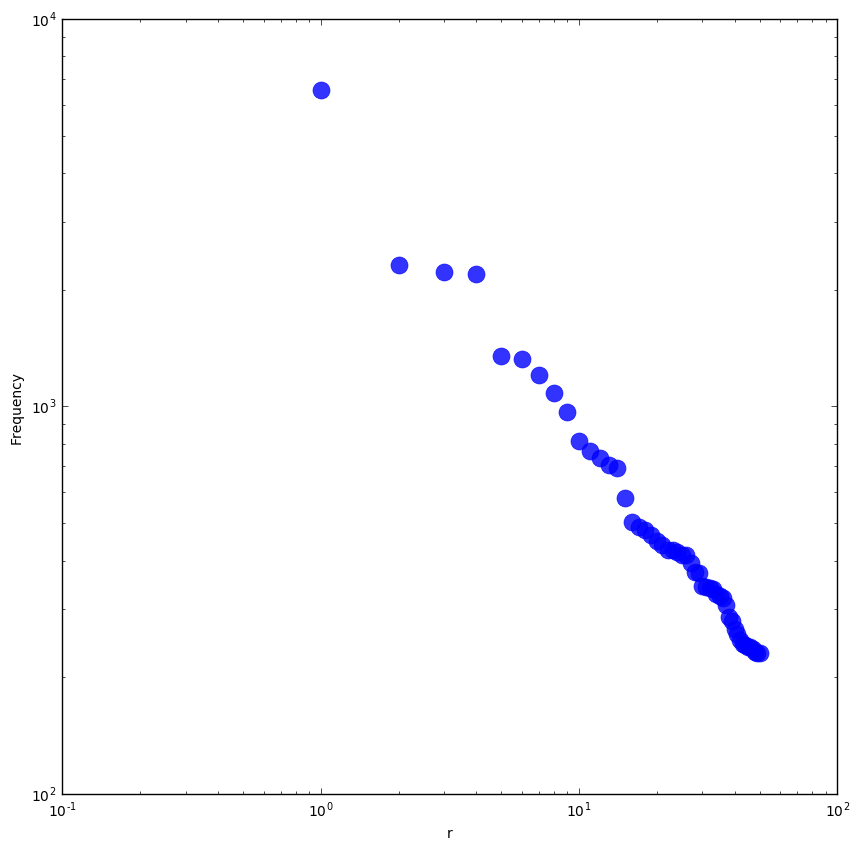

In [6]:
grafico, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", top_50_palavras, ax=ax, scatter_kws={"s": 150}, fit_reg = False, color = '#0000ff')

grafico

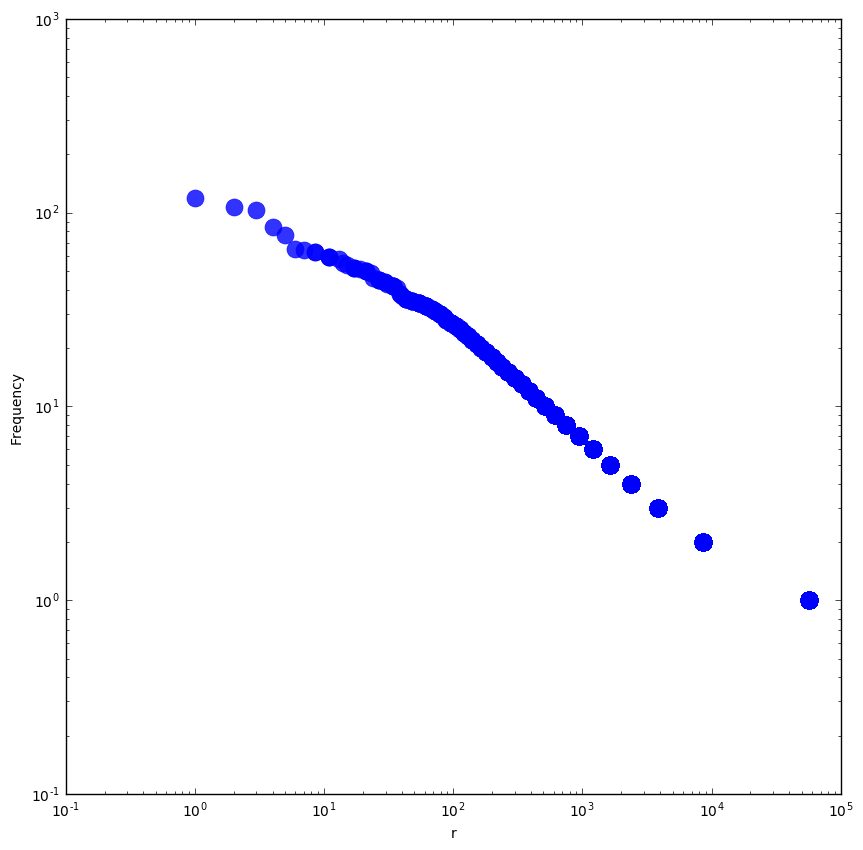

In [7]:

bigramas = nltk.bigrams(todas_palavras)
bigramas_freq = nltk.FreqDist(bigramas)
tabela_bigramas = pd.DataFrame(bigramas_freq.most_common(), columns=['word', 'Frequency'])
tabela_bigramas['r'] = tabela_bigramas['Frequency'].rank(ascending=False)



grafico2, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", tabela_bigramas, ax=ax, scatter_kws={"s": 150}, fit_reg = False, color = '#0000ff')
grafico2

## 4. Reproduza a tabela 4.5 do livro texto considerando a sua coleção

In [8]:
tabela_prob = pd.DataFrame()
tabela_prob['Number of Occurrences (n)'] = frequencia_palavra.values() 
tabela_prob = tabela_prob.groupby(['Number of Occurrences (n)'])['Number of Occurrences (n)'].size().reset_index(name='Actual Number of Words')
tabela_prob['Predicted Proportion (1/n(n+1))'] = np.round(1 / (tabela_prob['Number of Occurrences (n)']*(tabela_prob['Number of Occurrences (n)'] + 1)), 3)
tabela_prob['Actual Proportion'] = np.round(tabela_prob['Actual Number of Words'] / len(frequencia_palavra), 3)


tabela_prob

,Number of Occurrences (n),Actual Number of Words,Predicted Proportion (1/n(n+1)),Actual Proportion
0,1,9029,0.500,0.493
1,2,2973,0.167,0.162
2,3,1444,0.083,0.079
3,4,900,0.050,0.049
4,5,639,0.033,0.035
5,6,437,0.024,0.024
6,7,340,0.018,0.019
7,8,273,0.014,0.015
8,9,236,0.011,0.013
9,10,198,0.009,0.011
